# **Cars_Data_Analysis_2024**

In [151]:
import seaborn as sns
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [152]:
colors=sns.color_palette('crest')

In [153]:
#importing all excel sheet in notebook and create dataframe from it
data1 = pd.read_excel('/kaggle/input/car-sales-india-2024/Car Sales India 2024.xlsx')
data2 = pd.read_excel('/kaggle/input/car-sales-india-2024/Car Sales in India - 2024.xlsx')
data3 = pd.read_excel('/kaggle/input/car-sales-india-2024/Car Sales in India - 2024 (Unpivot Version).xlsx')
data1.head(),data2.head(),data3.head()

(      Make        Model  January February  March  April  May   June  July  \
 0  Citroen       Basalt        0        0      0      0    0    0.0     0   
 1  Citroen           C3      234      211    265    251  155   77.0    90   
 2  Citroen     Aircross      231      127    211     93  125  136.0    68   
 3  Citroen  C5 Aircross        1        0      0      1    0    0.0     0   
 4  Citroen         e-C3      184       83    530     59  235  126.0   177   
 
    August  September  October   November   December  Total Segment  Body Type  \
 0     579        341       221         47        79   1267      C2        SUV   
 1     507        300       300        200       300   2890      C1  Hatchback   
 2      38         41       103        201        96   1470      C2        SUV   
 3       1          1         4          0         1      9      D2        SUV   
 4     150         28        89         61        90   1812      C1        SUV   
 
    MoM %  YoY %  
 0     68      0 

In [154]:
print("-----------------------------first-------------------------------")
data1.info()
print("-----------------------------second-------------------------------")
data2.info()
print("-----------------------------third-------------------------------")
data3.info()

-----------------------------first-------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Make       87 non-null     object 
 1   Model      87 non-null     object 
 2   January    87 non-null     int64  
 3   February   87 non-null     object 
 4   March      87 non-null     int64  
 5   April      87 non-null     int64  
 6   May        87 non-null     int64  
 7   June       86 non-null     float64
 8   July       87 non-null     int64  
 9   August     87 non-null     int64  
 10  September  87 non-null     int64  
 11  October    87 non-null     int64  
 12  November   87 non-null     int64  
 13  December   87 non-null     int64  
 14  Total      87 non-null     int64  
 15  Segment    87 non-null     object 
 16  Body Type  87 non-null     object 
 17  MoM %      87 non-null     int64  
 18  YoY %      87 non-null    

In [155]:
#in first and second files or dataframe we have similar number of column and bot tables has similar rows
# but third table has only 9 columns but number of rows are 1043abs 


**In This data we donot have to fill null valuse as in some columns null valuse are the no of cars sell if in case any car is not sold in particular month the value must be zero but in some columns 
like 'Make','Model','MOM%, and 'YoY%' we bave to chech null values**


In [156]:

data1.isnull().sum(),data2.isnull().sum(),data3.isnull().sum()

(Make         0
 Model        0
 January      0
 February     0
 March        0
 April        0
 May          0
 June         1
 July         0
 August       0
 September    0
 October      0
 November     0
 December     0
 Total        0
 Segment      0
 Body Type    0
 MoM %        0
 YoY %        0
 dtype: int64,
 Make         0
 Model        0
 January      0
 February     0
 March        0
 April        0
 May          0
 June         1
 July         0
 August       0
 September    0
 October      0
 November     0
 December     0
 Total        0
 Segment      0
 Body Type    0
 MoM %        0
 YoY %        0
 dtype: int64,
 Make         0
 Model        0
 Months       0
 Sales        0
 Total        0
 Segment      0
 Body Type    0
 MoM %        0
 YoY %        0
 dtype: int64)

**as their is no any null values in 'Make','Model','MOM%, and 'YoY%' columns we donot have to fill any null values and also two columns names has sapce which need to fix**

In [157]:
data1.columns

Index(['Make', 'Model', 'January', 'February', 'March', 'April', 'May', 'June',
       'July', 'August', 'September', 'October ', 'November ', 'December',
       'Total', 'Segment', 'Body Type', 'MoM %', 'YoY %'],
      dtype='object')

In [158]:
# Fix incorrect value in 'February' for 'Ignis' model
data1.loc[data1['Model'] == 'Ignis', 'February'] = 211

# Ensure column names are correct (trim spaces)
data1.rename(columns=lambda x: x.strip(), inplace=True)

# we can also use the below method => data1.rename({'October ':'October','November ':'November'})

# Define months list which is useful through out the notebook
months = ['January', 'February', 'March', 'April', 'May', 'June', 
          'July', 'August', 'September', 'October', 'November', 'December']

profit= ['MoM %', 'YoY %']
# Perform groupby operation
Makers = data1.groupby('Make')[months + profit].sum().reset_index()
# Calculate total sales
Makers['Total_sales'] = Makers[months].sum(axis=1)

# Print the result
print(Makers)
Makers.describe()

          Make  January February   March   April     May      June    July  \
0      Citroen      650      421    1006     404     515     339.0     335   
1        Honda     8681     7142    7071    4351    4822    4804.0    4624   
2      Hyundai    57115    50201   53001   50901   49151   50103.0   49013   
3         Jeep      396      331     425     377     344     281.0     276   
4          Kia    23769    20200   21400   19968   19500   21300.0   20507   
5           MG     3825     4532    4648    4485    4769    4644.0    4572   
6     Mahindra    43068    42401   40631   41008   43218   40022.0   41623   
7       Maruti   166802   158373  152718  137952  144002  137160.0  137463   
8       Nissan     2863     2755    2701    2404    2211    2107.0    2011   
9      Renault     3826     4080    4225    3707    3709    3553.0    2832   
10       Skoda     2377     2254    2802    2579    2884    2566.0    2103   
11        Tata    53635    51270   50105   47885   46700   42156

,January,March,April,May,June,July,August,September,October,November,December,MoM %,YoY %
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,28105.071429,26384.357143,24126.428571,24932.642857,24146.214286,24501.857143,25305.214286,25634.214286,28424.785714,25113.714286,22953.214286,-5.714286,2478.642857
std,44713.498266,40907.563080,37488.811785,38766.069904,36935.993994,37199.935742,38420.715927,39154.884820,42953.250987,38199.377891,34935.629248,136.544402,9108.679847
min,396.000000,425.000000,377.000000,344.000000,281.000000,276.000000,340.000000,365.000000,424.000000,361.000000,286.000000,-232.000000,-140.000000
25%,2964.000000,2983.750000,2696.500000,2981.250000,2739.500000,2285.250000,2833.500000,3238.000000,3922.250000,2829.750000,3299.250000,-73.750000,-61.000000
50%,6253.500000,5859.500000,4418.000000,4795.500000,4724.000000,4598.000000,4948.500000,5131.500000,6295.500000,5512.000000,7170.500000,-3.500000,-13.000000
75%,38243.250000,36753.000000,35748.000000,38403.250000,36454.500000,38600.500000,39605.000000,36749.250000,43134.250000,40962.250000,37289.750000,80.250000,131.500000
max,166802.000000,152718.000000,137952.000000,144002.000000,137160.000000,137463.000000,143075.000000,144962.000000,159591.000000,141312.000000,130115.000000,258.000000,34117.000000


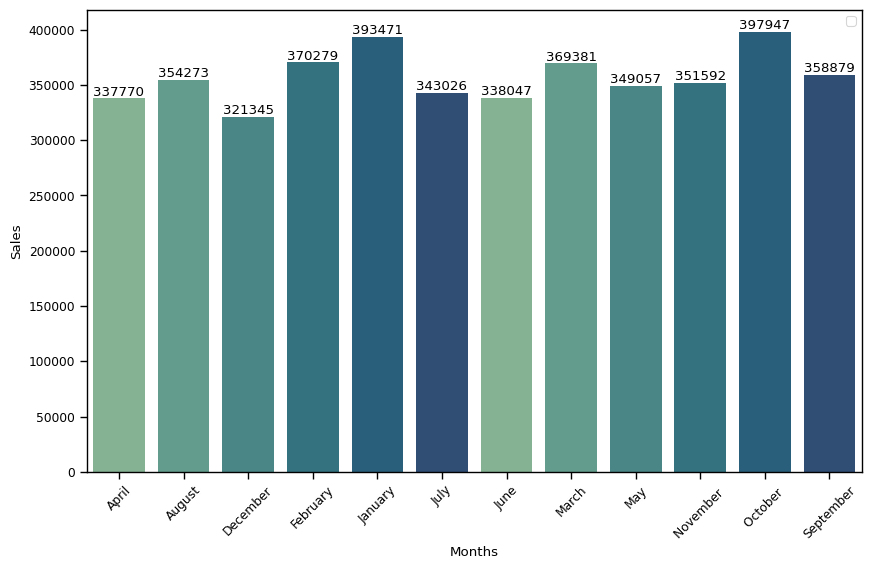

In [159]:
Month = data3.groupby('Months')['Sales'].sum().reset_index()
plt.figure(figsize=(10,6))
month_bars=sns.barplot(x='Months',y='Sales',data=Month,palette=colors)
plt.xticks(rotation=45)
plt.legend()
for i in month_bars.containers:
    month_bars.bar_label(i,)

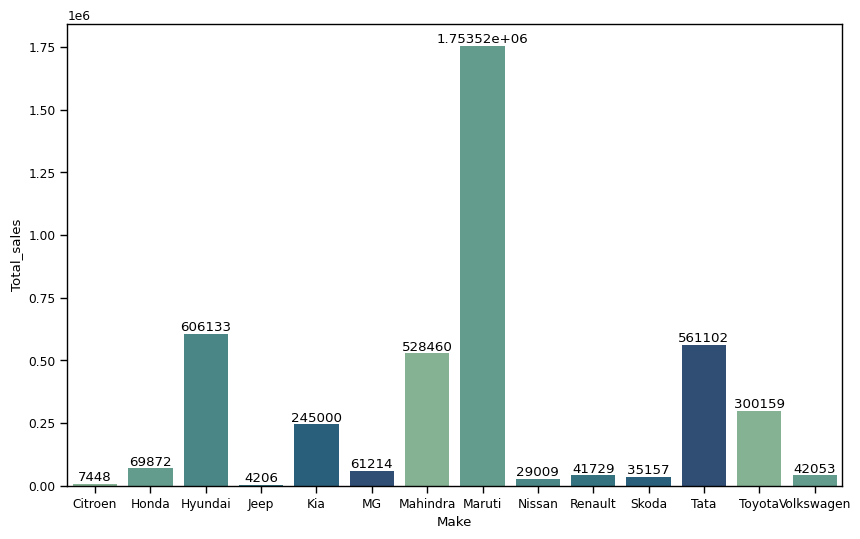

In [160]:
# So as per above Dataframe we have 14 makers with 87 different models 

#Now we will check which company sells most cars in 2024 for that we will use Seaborn Barplots
plt.figure(figsize=(10,6))
sns.set_context("paper", font_scale=1)
a=sns.barplot(x='Make',y='Total_sales',data = Makers,palette=colors)
for i in a.containers:
    a.bar_label(i,)


**As per above graph we clearly see that Maruti dominating Through out the car sales on second position we have hyundai and at third tata**

**Now we will check which companys make more profit in 2024 as per the above graph maruti must be at first position but we have to check all companys**

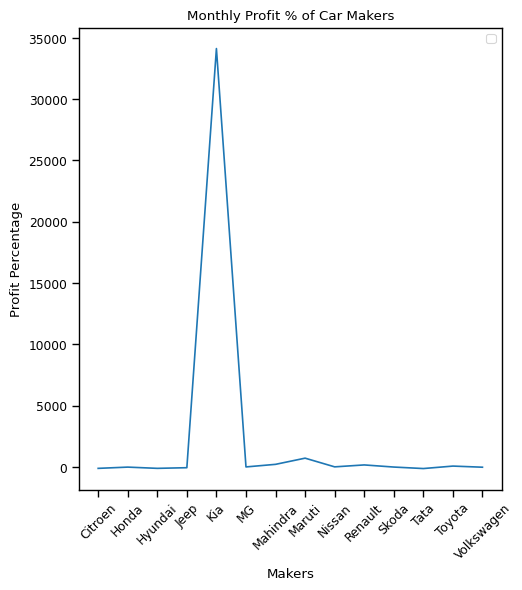

In [161]:

# Set figure size
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
# Line plot for MoM % and YoY % by Make

plt.plot(Makers['Make'],Makers['YoY %'])

# Labels and title
plt.xlabel("Makers")
plt.ylabel("Profit Percentage")
plt.title("Monthly Profit % of Car Makers")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.legend()

# Show plot
plt.show()


In [162]:
# As we see in above graph this data has one more mistake in kia yoy% which we can replace with average 
# yoy of all other Make for that we need to remove kia row temporariy
temp_df = Makers[Makers['Make'] != 'Kia']
temp_df.describe()
YoY_average = int(temp_df['YoY %'].mean())

In [163]:
Makers.loc[Makers['Make'] == 'Kia', 'YoY %'] = YoY_average

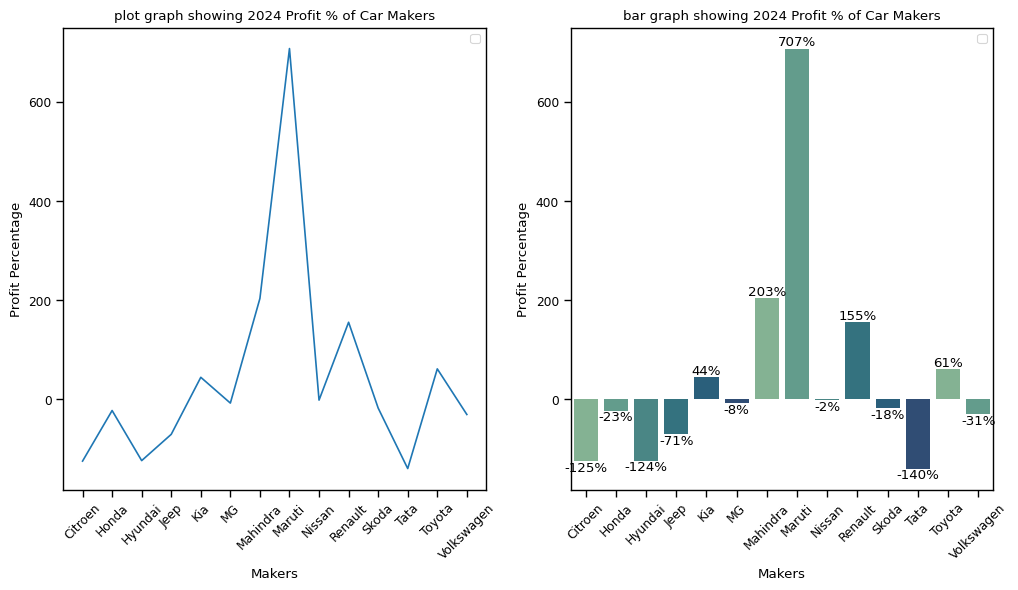

In [164]:
# Set figure size
plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
# Line plot for MoM % and YoY % by Make

plt.plot(Makers['Make'],Makers['YoY %'])

# Labels and title
plt.xlabel("Makers")
plt.ylabel("Profit Percentage")
plt.title("plot graph showing 2024 Profit % of Car Makers")
plt.xticks(rotation=45) 
plt.legend()

plt.subplot(1,2,2)

bar = sns.barplot(x='Make',y='YoY %',data=Makers,palette=colors)
plt.xlabel("Makers")
plt.ylabel("Profit Percentage")
plt.title("bar graph showing 2024 Profit % of Car Makers")
plt.xticks(rotation=45)
plt.legend()
for i in bar.containers:
    bar.bar_label(i,fmt='%.0f%%')
# Show plot
plt.show()

In [165]:
# Now we check top 10 most sell car models in 2024
data1.loc[data1['Make'] == 'Kia', 'YoY %'] = YoY_average
Models =  data1.groupby('Model')[months + profit].sum().reset_index()
Models['Total_sale'] =  Models[months].sum(axis=1)
Models.describe()

,January,March,April,May,June,July,August,September,October,November,December,MoM %,YoY %
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,4522.655172,4245.758621,3882.413793,4012.149425,3885.597701,3942.827586,4072.103448,4125.045977,4574.103448,4041.287356,3693.620690,-0.919540,9.241379
std,5557.293194,5225.786599,5022.921263,5017.870853,4891.952087,4894.956237,5018.810241,4946.506162,5433.186086,4916.494291,4696.681657,39.924993,54.469314
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,-87.000000
25%,207.500000,248.500000,186.000000,189.000000,136.500000,184.500000,258.000000,305.000000,298.000000,233.000000,194.500000,-23.500000,-25.500000
50%,1879.000000,1887.000000,1716.000000,1661.000000,1566.000000,1780.000000,1814.000000,1708.000000,2169.000000,1668.000000,1775.000000,-4.000000,0.000000
75%,6673.500000,6215.000000,6016.500000,5838.500000,5652.000000,5858.000000,6514.000000,6933.500000,6755.500000,5709.500000,5000.000000,16.500000,33.500000
max,19630.000000,17547.000000,19158.000000,19393.000000,18238.000000,17350.000000,19190.000000,17441.000000,18785.000000,16293.000000,17336.000000,147.000000,203.000000


<Axes: xlabel='Model', ylabel='Total_sale'>

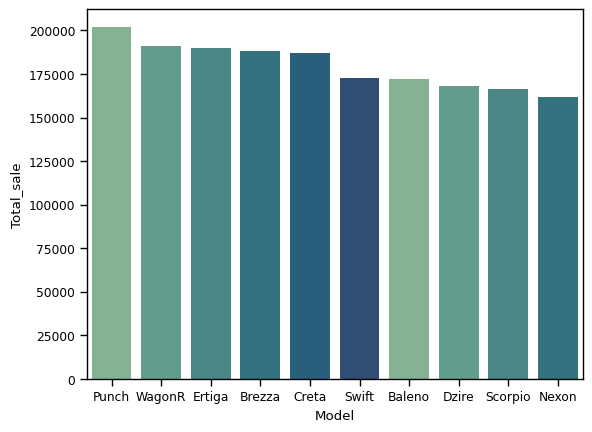

In [166]:
Models['Total_sale'] = Models['Total_sale'].astype(int)
m = Models.nlargest(10,'Total_sale')
sns.barplot(x='Model',y='Total_sale',data = m,palette = colors)

0     140807.0
1     306051.0
2     589952.0
3    1439979.0
4     823824.0
5     269454.0
6      46925.0
7       9005.0
8     659070.0
Name: Total_sale, dtype: object


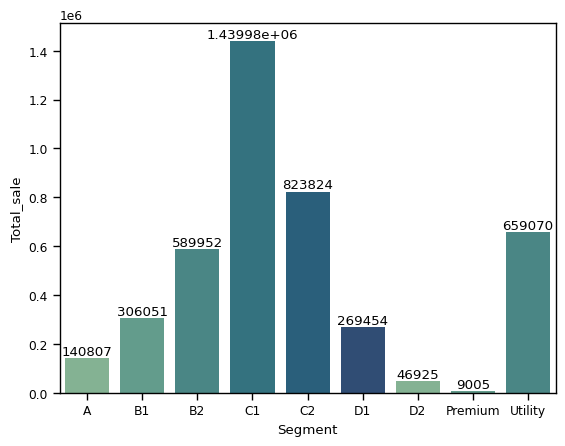

In [167]:
# Let check which seggment caar bough more in 2024
segment = data1.groupby('Segment')[months].sum().reset_index()
segment['Total_sale'] = segment[months].sum(axis=1)
segment.loc[segment['Segment']=='\nUtility','Segment']= 'Utility' #as utility row has /n 
segment.loc[segment['Segment']=='Premuim','Segment']= 'Premium' #as spelling of premium is premuim
segment2 = segment.groupby('Segment')['Total_sale'].sum().reset_index()
seg = sns.barplot(x='Segment',y='Total_sale',data = segment2, palette = colors)
for i in seg.containers:
    seg.bar_label(i,)
print(segment2['Total_sale'])

([<matplotlib.patches.Wedge at 0x7dcf2e58e1a0>,
 [Text(-1.0964157101205092, -0.08872762028218635, 'Hatchback'),
  Text(-0.20563363237873633, -1.0806085365361162, 'MUV'),
  Text(0.3639327611683344, -1.0380524771649997, 'Others'),
  Text(1.0320262348342755, 0.38068602629173204, 'SUV'),
  Text(-0.6391881046567851, 0.8952310131274871, 'Sedan')],
 [Text(-0.598044932793005, -0.04839688379028346, '24.8%'),
  Text(-0.11216379947931071, -0.5894228381106088, '16.7%'),
  Text(0.19850877881909146, -0.5662104420899998, '0.1%'),
  Text(0.5629234008186956, 0.20764692343185384, '50.4%'),
  Text(-0.3486480570855191, 0.4883078253422656, '8.0%')])

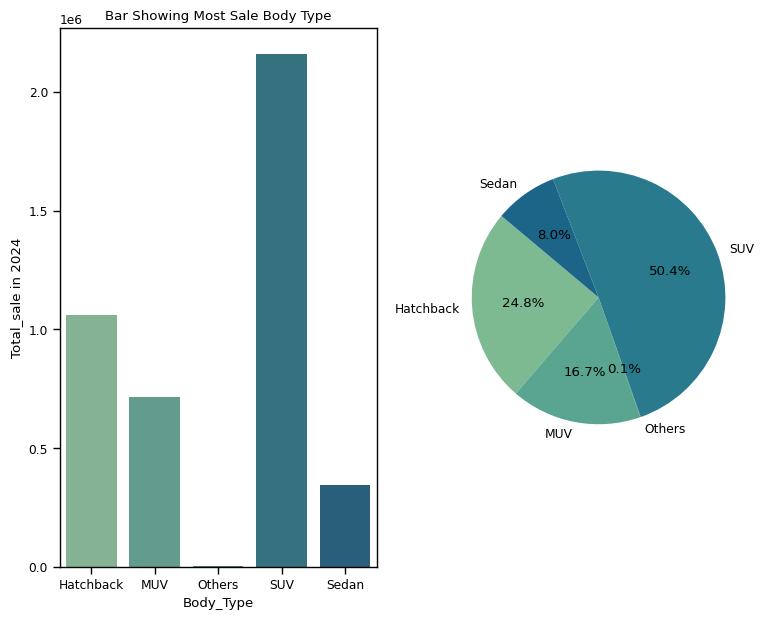

In [168]:
# now at last we check which body type bough by peoples more in 2024
Body = data1.groupby('Body Type')['Total'].sum().reset_index()
plt.figure(figsize=(9,7))
plt.subplot(1,2,1)
sns.barplot(x='Body Type',y='Total',data=Body,palette=colors)
plt.xlabel("Body_Type")
plt.ylabel('Total_sale in 2024')
plt.title("Bar Showing Most Sale Body Type")
plt.subplot(1,2,2)
plt.pie(Body['Total'], labels=Body['Body Type'], autopct='%1.1f%%', startangle=140,colors=colors)

# **Conclusion**
1. The Comapany that make highest profit in 2024 is > ***Maruti*** with total sales of 1753525.0 cars And ***Hundai*** and ***Tata*** are compant that comes in ***2nd*** or ***3rd** place in terms of sales
2. Top 10 models whos sa;es are higher in 2024 are 
**Punch,WagonR,Ertiga,Brezza,Creta,Swift,Baleno,Dzire,Scorpio,Nexon.**
3. The segments of cars that sold most in 2024 is ***C1*** Segmnet with total sales of 1439979.0 cars
4. The Most sold body type is **SUV**
5. Peoples Most Like To Buy Cars in **January , Octomber , February and March**  Months